In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from matplotlib.pyplot import figure
figure( figsize=(10, 8))
import scipy.stats as stats

In [2]:
## Importing the two datasets 
train = pd.read_excel('data_train.xlsx')
test = pd.read_excel('data_test.xlsx')
print('train', train.shape)
print('test' , test.shape)

train (255696, 13)
test (2644, 13)


In [3]:
train['bfgudid'].value_counts()

42dd57b6ee749c09522d83ed9eb564bcde8022b9    262
0dd403149eb5a994284647dc79f5beb480100cdc    240
a640d5d53412660294d1ed83348d9c330ab2e28b    173
80a590382ae9f946deca446fce6ef7f73c5a5359    173
cf4176621e4b36dc22629168380e002d7a06e709    164
                                           ... 
433144714652439417102c93c2b8520a9ebfbab9      7
827ebf48b5596d04231a419d8424829e89a21a1d      7
4540615d59ee14380a519161e9d455197385b3f4      7
6c747a7a551ea94769a74069b8e1aae273e50e2e      7
6000048b2329bcb071dcc12da41f0d71217d0281      7
Name: bfgudid, Length: 8000, dtype: int64

In [4]:
## Checking datatype
train.dtypes

bfgudid                       object
activity_date         datetime64[ns]
play_seconds                   int64
play_session_count             int64
app_store                     object
country_code                  object
product                       object
currency                      object
gross_usd_amount             float64
price_tier                   float64
day_since_install              int64
max_price_tier               float64
avg_price_tier               float64
dtype: object

In [5]:
## Checking datatype
test.dtypes

bfgudid                       object
activity_date         datetime64[ns]
play_seconds                   int64
play_session_count             int64
app_store                     object
country_code                  object
product                       object
currency                      object
gross_usd_amount             float64
price_tier                   float64
day_since_install              int64
max_price_tier               float64
avg_price_tier               float64
dtype: object

In [6]:
## Checking the null values on train data 
train.isnull().sum()

bfgudid                    0
activity_date              0
play_seconds               0
play_session_count         0
app_store                  0
country_code               0
product               176329
currency              176329
gross_usd_amount      176329
price_tier            176329
day_since_install          0
max_price_tier             0
avg_price_tier             0
dtype: int64

In [7]:
## Checking percentage of null values
train.isnull().sum() / train.shape[0] * 100

bfgudid                0.000000
activity_date          0.000000
play_seconds           0.000000
play_session_count     0.000000
app_store              0.000000
country_code           0.000000
product               68.960406
currency              68.960406
gross_usd_amount      68.960406
price_tier            68.960406
day_since_install      0.000000
max_price_tier         0.000000
avg_price_tier         0.000000
dtype: float64

In [8]:
## Checking the null values on test data 
test.isnull().sum()

bfgudid                 0
activity_date           0
play_seconds            0
play_session_count      0
app_store               0
country_code            0
product               808
currency              808
gross_usd_amount      808
price_tier            808
day_since_install       0
max_price_tier          0
avg_price_tier          0
dtype: int64

In [9]:
## Checking percentage of null values
test.isnull().sum() / test.shape[0] * 100

bfgudid                0.000000
activity_date          0.000000
play_seconds           0.000000
play_session_count     0.000000
app_store              0.000000
country_code           0.000000
product               30.559758
currency              30.559758
gross_usd_amount      30.559758
price_tier            30.559758
day_since_install      0.000000
max_price_tier         0.000000
avg_price_tier         0.000000
dtype: float64

In [10]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = train[train.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
13,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-13,29590,24,androidmarket,GB,herobundlea5,GBP,4.742879,4.99,1,19.99,5.378889
104,5a73538b0541dbe86260951ec46bc821761eddbf,2021-01-19,47919,39,androidmarket,GB,tier10,GBP,9.484268,9.99,5,9.99,6.290000
110,5a73538b0541dbe86260951ec46bc821761eddbf,2021-01-16,18905,45,androidmarket,GB,herobundlea5,GBP,4.758399,4.99,2,9.99,6.290000
130,2293e8ddb0e94925a3d09d6721c2523d5dd1d6f0,2021-01-21,12005,18,androidmarket,ID,herobundlea5,IDR,1.495897,4.99,6,7.99,4.463684
150,f24435aec5533a5ded5fd251f0ac0042b38f416f,2021-01-15,27013,14,itunes,NL,tier10,EUR,13.354234,9.99,3,9.99,6.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255683,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-23,15678,9,androidmarket,US,tier5,USD,4.990000,4.99,0,9.99,3.227500
255686,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-26,10807,8,androidmarket,US,tier5,USD,4.990000,4.99,3,9.99,3.227500
255688,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-29,12673,10,androidmarket,US,tier5,USD,4.990000,4.99,6,9.99,3.227500
255691,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500


In [11]:
train.describe()

,play_seconds,play_session_count,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
count,2.556960e+05,255696.000000,79367.000000,79367.000000,255696.000000,255696.000000,255696.000000
mean,8.582659e+03,10.185020,6.851771,6.681370,14.957657,12.709479,5.983366
std,1.638511e+04,11.795952,8.412426,6.531572,11.186289,11.346039,2.841539
min,0.000000e+00,0.000000,0.449972,1.990000,0.000000,1.990000,1.990000
25%,8.200000e+02,1.000000,2.990000,2.990000,6.000000,7.990000,4.490000
50%,5.228000e+03,7.000000,4.990000,4.990000,13.000000,9.990000,5.632857
75%,1.151700e+04,15.000000,7.990000,7.990000,23.000000,14.990000,6.708750
max,2.371950e+06,208.000000,136.673050,59.990000,47.000000,59.990000,49.990000


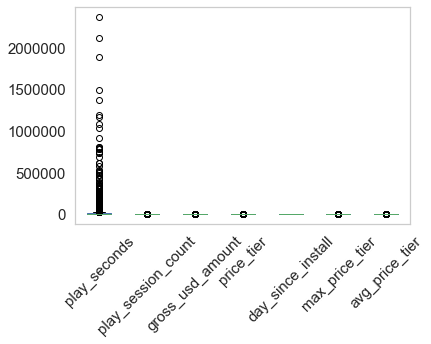

In [12]:
boxplot = train.boxplot(grid=False, rot=45, fontsize=15)  

In [13]:
train["play_seconds"].value_counts()

0        54185
1          139
2          106
3           87
4           77
         ...  
28253        1
30302        1
83082        1
74886        1
24342        1
Name: play_seconds, Length: 31318, dtype: int64

In [14]:
train["play_session_count"].value_counts()

0      53969
1      12635
2      12603
3      12156
4      11720
       ...  
155        1
176        1
110        1
108        1
112        1
Name: play_session_count, Length: 133, dtype: int64

In [15]:
train.isnull().sum()

bfgudid                    0
activity_date              0
play_seconds               0
play_session_count         0
app_store                  0
country_code               0
product               176329
currency              176329
gross_usd_amount      176329
price_tier            176329
day_since_install          0
max_price_tier             0
avg_price_tier             0
dtype: int64

In [16]:
train

,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115,19,androidmarket,GB,creatureupgrade3,GBP,3.401175,2.99,3,19.99,5.378889
1,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115,19,androidmarket,GB,energytierb3,GBP,3.401175,2.99,3,19.99,5.378889
2,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929,31,androidmarket,GB,energytierb3,GBP,3.385406,2.99,6,19.99,5.378889
3,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929,31,androidmarket,GB,starterbundletier5,GBP,4.745007,4.99,6,19.99,5.378889
4,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929,31,androidmarket,GB,creaturepack5,GBP,4.745007,4.99,6,19.99,5.378889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255691,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255692,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255693,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-23,15678,9,androidmarket,US,bundletier7,USD,6.990000,6.99,0,9.99,3.227500
255694,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308,13,androidmarket,US,worker7,USD,6.990000,6.99,2,9.99,3.227500


### Missing Value Imputation 

In [17]:
### Imputing missing value for product  
train['product'] = train.groupby('bfgudid')['product'].bfill().ffill()
test['product'] = test.groupby('bfgudid')['product'].bfill().ffill()


In [18]:
train['product']

0           creatureupgrade3
1               energytierb3
2               energytierb3
3         starterbundletier5
4              creaturepack5
                 ...        
255691                 tier5
255692                 tier5
255693           bundletier7
255694               worker7
255695              island08
Name: product, Length: 255696, dtype: object

In [19]:
len(train['product'].unique())

39

In [20]:
### Imputing missing value for price_tier 
train['price_tier'] = train.groupby('product')['price_tier'].apply(lambda x: x.interpolate(method='linear')).bfill()
test['price_tier'] = test.groupby('product')['price_tier'].apply(lambda x: x.interpolate(method='linear')).bfill()

In [21]:
train.isnull().sum()

bfgudid                    0
activity_date              0
play_seconds               0
play_session_count         0
app_store                  0
country_code               0
product                    0
currency              176329
gross_usd_amount      176329
price_tier                 0
day_since_install          0
max_price_tier             0
avg_price_tier             0
dtype: int64

In [22]:
test.isnull().sum()

bfgudid                 0
activity_date           0
play_seconds            0
play_session_count      0
app_store               0
country_code            0
product                 0
currency              808
gross_usd_amount      808
price_tier              0
day_since_install       0
max_price_tier          0
avg_price_tier          0
dtype: int64

In [23]:
### Imputing missing value for gross_usd_amount 
train['gross_usd_amount'] = train.groupby('product')['gross_usd_amount'].apply(lambda x: x.interpolate(method='linear')).bfill()
test['gross_usd_amount'] = test.groupby('product')['gross_usd_amount'].apply(lambda x: x.interpolate(method='linear')).bfill()

In [24]:
train.isnull().sum()

bfgudid                    0
activity_date              0
play_seconds               0
play_session_count         0
app_store                  0
country_code               0
product                    0
currency              176329
gross_usd_amount           0
price_tier                 0
day_since_install          0
max_price_tier             0
avg_price_tier             0
dtype: int64

In [25]:
test.isnull().sum()

bfgudid                 0
activity_date           0
play_seconds            0
play_session_count      0
app_store               0
country_code            0
product                 0
currency              808
gross_usd_amount        0
price_tier              0
day_since_install       0
max_price_tier          0
avg_price_tier          0
dtype: int64

In [26]:
### Imputing missing value for currency 
train['currency'] = train.groupby(['bfgudid'], sort=False)['currency'].apply(lambda x: x.fillna(x.mode().iloc[0]))
test['currency'] = test.groupby(['bfgudid'], sort=False)['currency'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [27]:
train.isnull().sum()

bfgudid               0
activity_date         0
play_seconds          0
play_session_count    0
app_store             0
country_code          0
product               0
currency              0
gross_usd_amount      0
price_tier            0
day_since_install     0
max_price_tier        0
avg_price_tier        0
dtype: int64

In [28]:
test.isnull().sum()

bfgudid               0
activity_date         0
play_seconds          0
play_session_count    0
app_store             0
country_code          0
product               0
currency              0
gross_usd_amount      0
price_tier            0
day_since_install     0
max_price_tier        0
avg_price_tier        0
dtype: int64

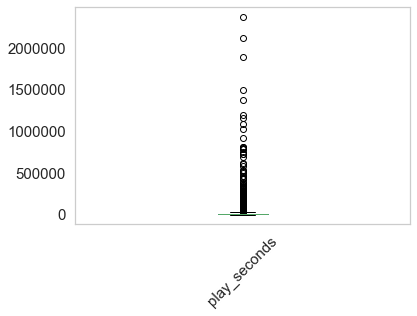

In [29]:
train.boxplot(column='play_seconds', return_type='axes', grid=False, rot=45, fontsize=15)  


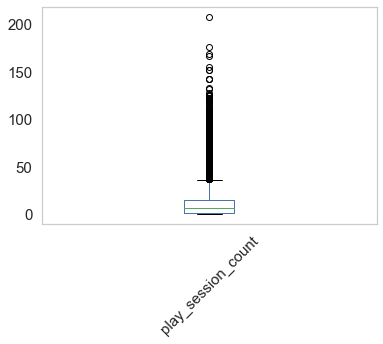

In [30]:
train.boxplot(column='play_session_count', return_type='axes', grid=False, rot=45, fontsize=15)  

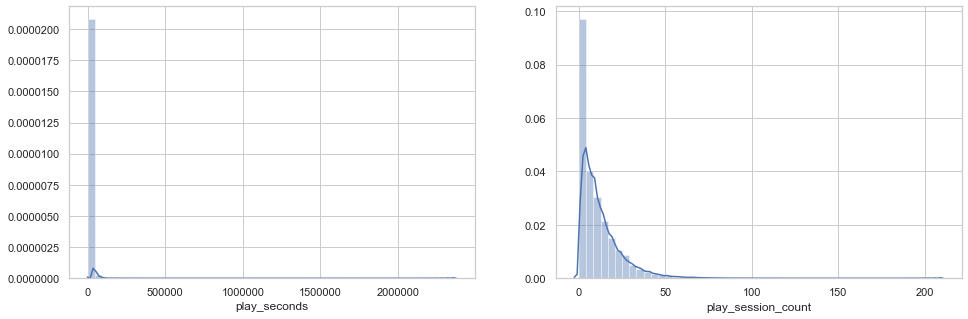

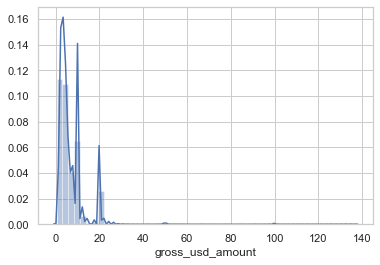

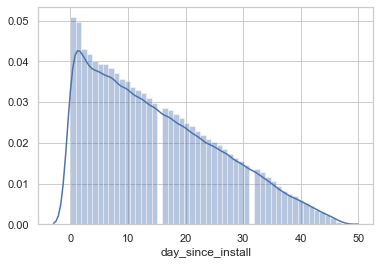

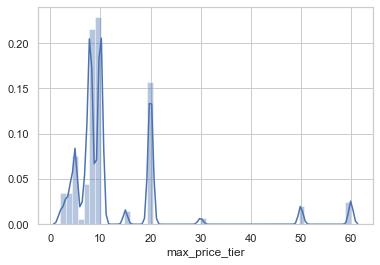

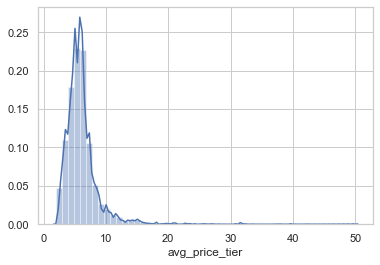

In [31]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(train['play_seconds'])
plt.subplot(1,2,2)
sns.distplot(train['play_session_count'])
plt.show()
sns.distplot(train['gross_usd_amount'])
plt.show()
sns.distplot(train['day_since_install'])
plt.show()
sns.distplot(train['max_price_tier'])
plt.show()
sns.distplot(train['avg_price_tier'])
plt.show()


### Removing Outliers

In [32]:
### play_seconds
### Finding the Boundary Values
print("Highest allowed",train['play_seconds'].mean() + 3*train['play_seconds'].std())
print("Lowest allowed",train['play_seconds'].mean() - 3*train['play_seconds'].std())

Highest allowed 57737.993247993254
Lowest allowed -40572.67589457357


In [33]:
### play_seconds
### Finding the Outliers
train[(train['play_seconds'] > 57737.993247993254) | (train['play_seconds'] < -40572.67589457357)]

,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
105,5a73538b0541dbe86260951ec46bc821761eddbf,2021-01-17,71116,40,androidmarket,GB,herobundlea5,GBP,4.745136,4.99,3,9.99,6.290000
1193,bae863b81d28b641c36acbe9fa82bf659d1b7167,2021-01-24,74450,1,androidmarket,BR,creaturepack3,BRL,2.294278,2.99,10,9.99,4.693704
1614,957202bd8444414c1ad70aa66bddb07c73ee0f05,2021-01-15,88509,8,androidmarket,BR,workerbundle4,BRL,1.518653,3.99,3,7.99,5.990000
1615,957202bd8444414c1ad70aa66bddb07c73ee0f05,2021-01-13,75931,4,androidmarket,BR,treasurebundle8,BRL,2.939560,7.99,1,7.99,5.990000
1617,957202bd8444414c1ad70aa66bddb07c73ee0f05,2021-01-25,245780,13,androidmarket,BR,treasurebundle8,BRL,3.395845,7.99,13,7.99,5.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255314,8de4f5218f7c89713a9624121e3dfcde91109d22,2021-01-31,62412,11,androidmarket,US,tier10,USD,9.990000,9.99,8,19.99,7.504286
255315,8de4f5218f7c89713a9624121e3dfcde91109d22,2021-01-31,62412,11,androidmarket,US,tier10,USD,9.990000,9.99,8,19.99,7.504286
255319,8de4f5218f7c89713a9624121e3dfcde91109d22,2021-01-26,73881,14,androidmarket,US,tier10,USD,9.990000,9.99,3,19.99,7.504286
255320,8de4f5218f7c89713a9624121e3dfcde91109d22,2021-01-26,73881,14,androidmarket,US,tier10,USD,9.990000,9.99,3,19.99,7.504286


In [34]:
### play_seconds
### Capping on Outliers
upper_limit = train['play_seconds'].mean() + 3*train['play_seconds'].std()
lower_limit = train['play_seconds'].mean() - 3*train['play_seconds'].std()

In [35]:
### play_seconds
### Now, apply the Capping
train['play_seconds'] = np.where(
    train['play_seconds']>upper_limit,
    upper_limit,
    np.where(
        train['play_seconds']<lower_limit,
        lower_limit,
        train['play_seconds']
    )
)

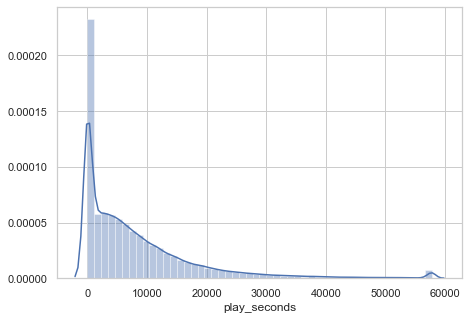

In [36]:
### play_seconds
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(train['play_seconds'])


In [37]:
### Trimming Outliers
new_train = train[(train['play_seconds'] < 57737.993247993254) & (train['play_seconds'] > -40572.67589457357)]
new_train

,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,creatureupgrade3,GBP,3.401175,2.99,3,19.99,5.378889
1,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,energytierb3,GBP,3.401175,2.99,3,19.99,5.378889
2,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,energytierb3,GBP,3.385406,2.99,6,19.99,5.378889
3,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,starterbundletier5,GBP,4.745007,4.99,6,19.99,5.378889
4,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,creaturepack5,GBP,4.745007,4.99,6,19.99,5.378889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255691,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255692,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255693,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-23,15678.0,9,androidmarket,US,bundletier7,USD,6.990000,6.99,0,9.99,3.227500
255694,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,worker7,USD,6.990000,6.99,2,9.99,3.227500


In [38]:
new_train.head()

,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,creatureupgrade3,GBP,3.401175,2.99,3,19.99,5.378889
1,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,energytierb3,GBP,3.401175,2.99,3,19.99,5.378889
2,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,energytierb3,GBP,3.385406,2.99,6,19.99,5.378889
3,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,starterbundletier5,GBP,4.745007,4.99,6,19.99,5.378889
4,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,creaturepack5,GBP,4.745007,4.99,6,19.99,5.378889


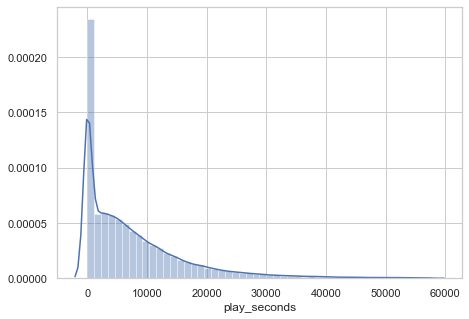

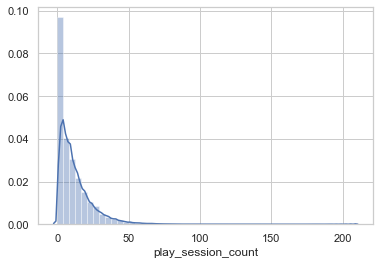

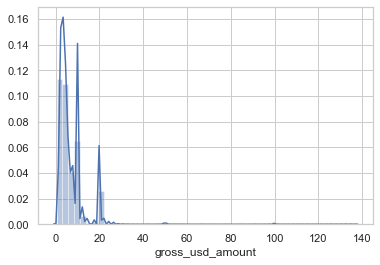

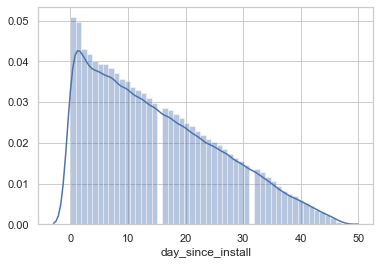

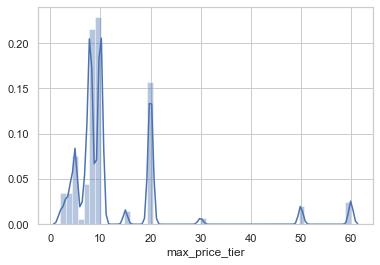

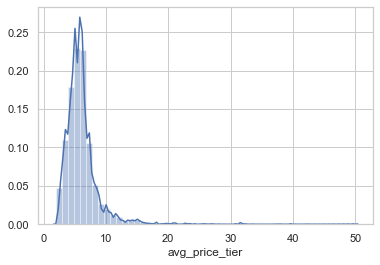

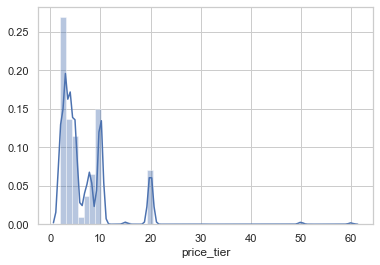

In [39]:
### play_seconds
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_train['play_seconds'])
plt.show()
sns.distplot(train['play_session_count'])
plt.show()
sns.distplot(train['gross_usd_amount'])
plt.show()
sns.distplot(train['day_since_install'])
plt.show()
sns.distplot(train['max_price_tier'])
plt.show()
sns.distplot(train['avg_price_tier'])
plt.show()
sns.distplot(train['price_tier'])
plt.show()


### Exploratory Data Analysis

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

#### Target Variable Distribution

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency. 

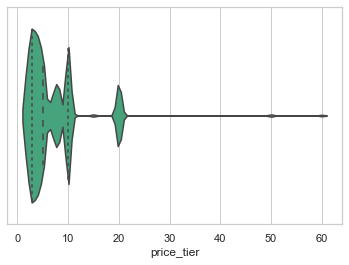

In [40]:
sns.violinplot(x=new_train['price_tier'], inner="quartile", color="#36B37E");

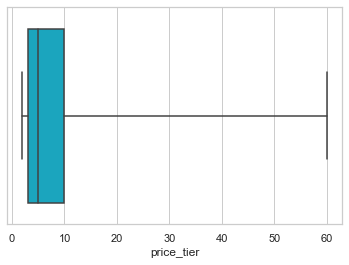

In [41]:
sns.boxplot(new_train['price_tier'], whis=10, color="#00B8D9");


### Correlation Between Variables¶


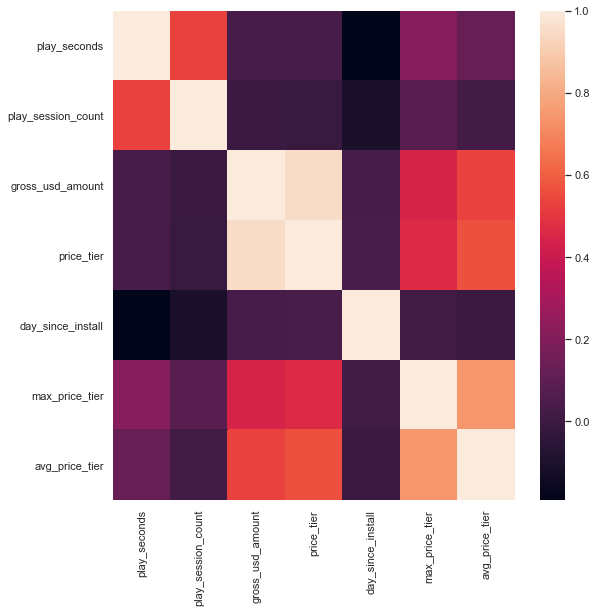

In [42]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(new_train.corr(), ax=ax);

### Relatioships Between the Target Variable and Other Varibles¶


#### High Positive Correlation¶


Firstly, we want to visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are gross_usd_amount, and max_price_tier.

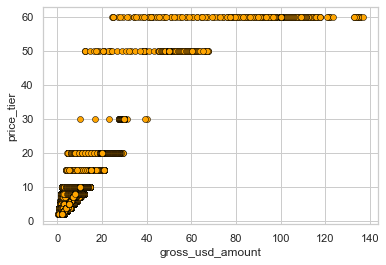

In [43]:
plt.scatter(x=new_train['gross_usd_amount'], y=new_train['price_tier'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("gross_usd_amount"); plt.ylabel("price_tier");

We can see that they are truly positively correlated

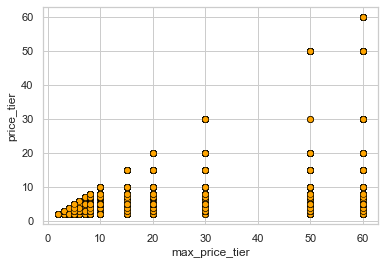

In [44]:
plt.scatter(x=new_train['max_price_tier'], y=new_train['price_tier'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("max_price_tier"); plt.ylabel("price_tier");

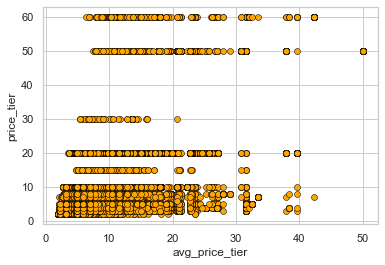

In [45]:
plt.scatter(x=new_train['avg_price_tier'], y=new_train['price_tier'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("avg_price_tier"); plt.ylabel("price_tier");

In [46]:
new_train

,bfgudid,activity_date,play_seconds,play_session_count,app_store,country_code,product,currency,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,creatureupgrade3,GBP,3.401175,2.99,3,19.99,5.378889
1,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-15,22115.0,19,androidmarket,GB,energytierb3,GBP,3.401175,2.99,3,19.99,5.378889
2,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,energytierb3,GBP,3.385406,2.99,6,19.99,5.378889
3,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,starterbundletier5,GBP,4.745007,4.99,6,19.99,5.378889
4,7eeae35fe8811922ece9e886e020889e431b7a26,2021-01-18,28929.0,31,androidmarket,GB,creaturepack5,GBP,4.745007,4.99,6,19.99,5.378889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255691,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255692,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,tier5,USD,4.990000,4.99,2,9.99,3.227500
255693,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-23,15678.0,9,androidmarket,US,bundletier7,USD,6.990000,6.99,0,9.99,3.227500
255694,e2539e2e63d88f74d9cbed6d4ab046778dfdbe21,2021-01-25,24308.0,13,androidmarket,US,worker7,USD,6.990000,6.99,2,9.99,3.227500


In [47]:
new_train.dtypes

bfgudid                       object
activity_date         datetime64[ns]
play_seconds                 float64
play_session_count             int64
app_store                     object
country_code                  object
product                       object
currency                      object
gross_usd_amount             float64
price_tier                   float64
day_since_install              int64
max_price_tier               float64
avg_price_tier               float64
dtype: object

In [48]:
len(train['currency'].unique())

50

In [49]:
len(test['currency'].unique())

34

In [50]:
len(train['country_code'].unique())

94

In [51]:
len(test['country_code'].unique())

46

In [52]:
len(train['app_store'].unique())

2

In [53]:
new_train.drop(["bfgudid", "app_store", "country_code", "product", "currency"], axis = 1, inplace=True)

In [54]:
test.drop(["bfgudid", "app_store", "country_code", "product", "currency"], axis = 1, inplace=True)

In [55]:
new_train.drop(["activity_date"], axis = 1, inplace=True)

In [56]:
test.drop(["activity_date"], axis = 1, inplace=True)

In [57]:
new_train1 = pd.get_dummies(new_train)

In [58]:
new_train.head()

,play_seconds,play_session_count,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,22115.0,19,3.401175,2.99,3,19.99,5.378889
1,22115.0,19,3.401175,2.99,3,19.99,5.378889
2,28929.0,31,3.385406,2.99,6,19.99,5.378889
3,28929.0,31,4.745007,4.99,6,19.99,5.378889
4,28929.0,31,4.745007,4.99,6,19.99,5.378889


In [59]:
new_train.dtypes

play_seconds          float64
play_session_count      int64
gross_usd_amount      float64
price_tier            float64
day_since_install       int64
max_price_tier        float64
avg_price_tier        float64
dtype: object

In [60]:
test.dtypes

play_seconds            int64
play_session_count      int64
gross_usd_amount      float64
price_tier            float64
day_since_install       int64
max_price_tier        float64
avg_price_tier        float64
dtype: object

In [61]:
test.head()

,play_seconds,play_session_count,gross_usd_amount,price_tier,day_since_install,max_price_tier,avg_price_tier
0,7815,12,3.438189,2.99,4,2.99,2.99
1,1516,5,3.460608,2.99,1,2.99,2.99
2,7968,13,3.620749,2.99,3,2.99,2.99
3,1046,4,3.780890,2.99,0,2.99,2.99
4,3862,13,3.941031,2.99,2,2.99,2.99


### Train-Test Split

In [62]:
X_train = new_train.drop(columns='price_tier')
y_train = new_train['price_tier']
X_test = test.drop(columns='price_tier')
y_test = test['price_tier']

In [63]:
y_train.dtypes

dtype('float64')

In [64]:
y_train.describe

<bound method NDFrame.describe of 0         2.99
1         2.99
2         2.99
3         4.99
4         4.99
          ... 
255691    4.99
255692    4.99
255693    6.99
255694    6.99
255695    7.99
Name: price_tier, Length: 253530, dtype: float64>

In [65]:
new_train.describe

<bound method NDFrame.describe of         play_seconds  play_session_count  gross_usd_amount  price_tier  \
0            22115.0                  19          3.401175        2.99   
1            22115.0                  19          3.401175        2.99   
2            28929.0                  31          3.385406        2.99   
3            28929.0                  31          4.745007        4.99   
4            28929.0                  31          4.745007        4.99   
...              ...                 ...               ...         ...   
255691       24308.0                  13          4.990000        4.99   
255692       24308.0                  13          4.990000        4.99   
255693       15678.0                   9          6.990000        6.99   
255694       24308.0                  13          6.990000        6.99   
255695        5729.0                  11          7.990000        7.99   

        day_since_install  max_price_tier  avg_price_tier  
0                

In [66]:
X_train.head()

,play_seconds,play_session_count,gross_usd_amount,day_since_install,max_price_tier,avg_price_tier
0,22115.0,19,3.401175,3,19.99,5.378889
1,22115.0,19,3.401175,3,19.99,5.378889
2,28929.0,31,3.385406,6,19.99,5.378889
3,28929.0,31,4.745007,6,19.99,5.378889
4,28929.0,31,4.745007,6,19.99,5.378889


In [67]:
X_train.dtypes

play_seconds          float64
play_session_count      int64
gross_usd_amount      float64
day_since_install       int64
max_price_tier        float64
avg_price_tier        float64
dtype: object

In [68]:
X_train

,play_seconds,play_session_count,gross_usd_amount,day_since_install,max_price_tier,avg_price_tier
0,22115.0,19,3.401175,3,19.99,5.378889
1,22115.0,19,3.401175,3,19.99,5.378889
2,28929.0,31,3.385406,6,19.99,5.378889
3,28929.0,31,4.745007,6,19.99,5.378889
4,28929.0,31,4.745007,6,19.99,5.378889
...,...,...,...,...,...,...
255691,24308.0,13,4.990000,2,9.99,3.227500
255692,24308.0,13,4.990000,2,9.99,3.227500
255693,15678.0,9,6.990000,0,9.99,3.227500
255694,24308.0,13,6.990000,2,9.99,3.227500


In [69]:
X_train_values = X_train.values

In [70]:
X_train_values

array([[2.21150000e+04, 1.90000000e+01, 3.40117481e+00, 3.00000000e+00,
        1.99900000e+01, 5.37888889e+00],
       [2.21150000e+04, 1.90000000e+01, 3.40117481e+00, 3.00000000e+00,
        1.99900000e+01, 5.37888889e+00],
       [2.89290000e+04, 3.10000000e+01, 3.38540595e+00, 6.00000000e+00,
        1.99900000e+01, 5.37888889e+00],
       ...,
       [1.56780000e+04, 9.00000000e+00, 6.99000000e+00, 0.00000000e+00,
        9.99000000e+00, 3.22750000e+00],
       [2.43080000e+04, 1.30000000e+01, 6.99000000e+00, 2.00000000e+00,
        9.99000000e+00, 3.22750000e+00],
       [5.72900000e+03, 1.10000000e+01, 7.99000000e+00, 5.00000000e+00,
        9.99000000e+00, 3.22750000e+00]])

In [71]:
y_train_values = y_train.values

In [72]:
X_test_values = X_test.values

In [73]:
y_test_values = y_test.values

In [74]:
y_train_values

array([2.99, 2.99, 2.99, ..., 6.99, 6.99, 7.99])

In [75]:
X_train

,play_seconds,play_session_count,gross_usd_amount,day_since_install,max_price_tier,avg_price_tier
0,22115.0,19,3.401175,3,19.99,5.378889
1,22115.0,19,3.401175,3,19.99,5.378889
2,28929.0,31,3.385406,6,19.99,5.378889
3,28929.0,31,4.745007,6,19.99,5.378889
4,28929.0,31,4.745007,6,19.99,5.378889
...,...,...,...,...,...,...
255691,24308.0,13,4.990000,2,9.99,3.227500
255692,24308.0,13,4.990000,2,9.99,3.227500
255693,15678.0,9,6.990000,0,9.99,3.227500
255694,24308.0,13,6.990000,2,9.99,3.227500


In [76]:
X_test

,play_seconds,play_session_count,gross_usd_amount,day_since_install,max_price_tier,avg_price_tier
0,7815,12,3.438189,4,2.99,2.99
1,1516,5,3.460608,1,2.99,2.99
2,7968,13,3.620749,3,2.99,2.99
3,1046,4,3.780890,0,2.99,2.99
4,3862,13,3.941031,2,2.99,2.99
...,...,...,...,...,...,...
2639,3906,4,4.990000,0,6.99,5.49
2640,3906,4,4.990000,0,6.99,5.49
2641,3906,4,6.990000,0,6.99,5.49
2642,35773,22,4.990000,0,6.99,5.99


In [77]:
y_train

0         2.99
1         2.99
2         2.99
3         4.99
4         4.99
          ... 
255691    4.99
255692    4.99
255693    6.99
255694    6.99
255695    7.99
Name: price_tier, Length: 253530, dtype: float64

In [78]:
y_test

0       2.99
1       2.99
2       2.99
3       2.99
4       2.99
        ... 
2639    4.99
2640    4.99
2641    6.99
2642    4.99
2643    6.99
Name: price_tier, Length: 2644, dtype: float64

### Model training and visualising

In [79]:
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [80]:
perf = []
method = []

In [81]:
from sklearn.metrics import mean_squared_log_error

In [82]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train_values, y_train_values)
predictions = ridge.predict(X_test_values)

r_squared = r2_score(predictions, y_test_values)

print("R2 Score:", r_squared)
method.append('Ridge Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_test_values))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.8031741386254135
RMSLE: 0.19523704469483474


In [83]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train_values, y_train_values)
predictions = lasso.predict(X_test_values)

r_squared = r2_score(predictions, y_test_values)

print("R2 Score:", r_squared)
method.append('Lasso Regression')

rmsle = np.sqrt(mean_squared_log_error(predictions, y_test_values))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.8015923062621759
RMSLE: 0.2013485339430409


In [ ]:
pip install -q xgboost

In [84]:
# xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train_values, y_train_values)
predictions = xgb.predict(X_test_values)

r_squared = r2_score(predictions, y_test_values)

print("R2 Score:", r_squared)
method.append('XGBoost Regressor')
rmsle = np.sqrt(mean_squared_log_error(predictions, y_test_values))
print("RMSLE:", rmsle)
perf.append(rmsle)

R2 Score: 0.9108522013959057
RMSLE: 0.1440172147330408


In [85]:
#Random forest regressor
for i in range(50 , 500, 50):
    random_forest = RandomForestRegressor(n_estimators=i)
    random_forest.fit(X_train_values, y_train_values)
    predictions = random_forest.predict(X_test_values)

    r_squared = r2_score(predictions, y_test_values)

    print("R2 Score:", r_squared)
    method.append('Random Forest Regressor')
    rmsle = np.sqrt(mean_squared_log_error(predictions, y_test_values))
    print("RMSLE:", rmsle)
    perf.append(rmsle)

R2 Score: 0.9060140912725066
RMSLE: 0.14694308449192414
R2 Score: 0.9055746876457588
RMSLE: 0.1470117133954948
R2 Score: 0.9073654310120839
RMSLE: 0.14679340441480232
R2 Score: 0.9058819016323507
RMSLE: 0.1485401482371641
R2 Score: 0.9072017513221591
RMSLE: 0.14702412699108336
R2 Score: 0.9054635668377203
RMSLE: 0.1484532149897282
R2 Score: 0.9059734293097157
RMSLE: 0.14702095565301726
R2 Score: 0.9055650538692618
RMSLE: 0.14721752362343002
R2 Score: 0.9061176834257956
RMSLE: 0.14743082121479675


Text(0.5, 1.0, 'RMSLE comparison of models')

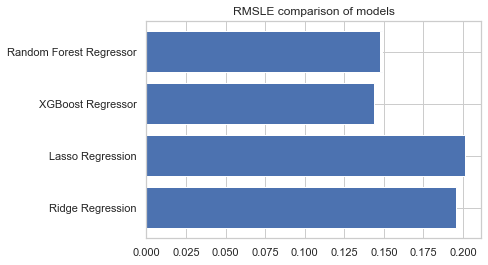

In [86]:
# Compare performances of models
plt.barh(method, perf)
plt.title('RMSLE comparison of models')